<a href="https://colab.research.google.com/github/Syiful047/SENIN-SIANG_SYIFUL-ANAM_0110222144/blob/main/Praktikum13_Mandiri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Implementasi Multi-Layer Perceptron (MLP) pada Dataset MNIST**

# **Tujuan Praktikum**
1. Menerapkan Artificial Neural Network (ANN) pada dataset citra.
2. Mengimplementasikan Multi-Layer Perceptron (MLP) untuk klasifikasi multi-kelas.
3. Membandingkan proses pelatihan dan evaluasi ANN pada dataset tabular (Titanic) dan dataset citra (MNIST).

# **Import Library**

In [1]:
# Library numerik dan visualisasi
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset MNIST
from tensorflow.keras.datasets import mnist

# Model dan layer ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Utility
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Evaluasi
from sklearn.metrics import classification_report, confusion_matrix

# **Load Dataset MNIST**

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Jumlah data latih :", X_train.shape)
print("Jumlah data uji   :", X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Jumlah data latih : (60000, 28, 28)
Jumlah data uji   : (10000, 28, 28)


* Dataset MNIST berisi 60.000 data latih dan 10.000 data uji
* Setiap citra berukuran 28×28 piksel grayscale
* Label berupa angka 0–9

# **Visualisasi Data**

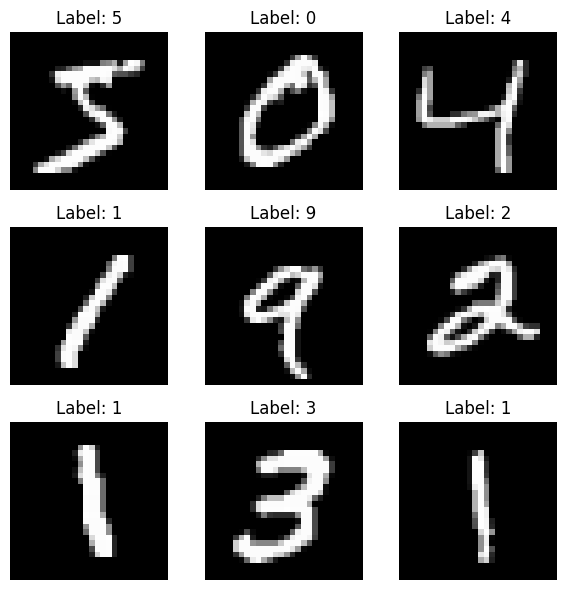

In [3]:
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

Visualisasi ini membantu memahami bahwa dataset MNIST merupakan citra tulisan tangan dengan variasi bentuk yang tinggi.

# **Preprocessing Data**

In [4]:
# Normalisasi nilai piksel (0–255 → 0–1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encoding label
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print("Shape label setelah encoding:", y_train_cat.shape)

Shape label setelah encoding: (60000, 10)


* Normalisasi mempercepat konvergensi training
* One-hot encoding diperlukan untuk klasifikasi multi-kelas
* Contoh: angka 3 → [0 0 0 1 0 0 0 0 0 0]

# **Arsitektur Model MLP**

In [5]:
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Mengubah citra menjadi vektor 784
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

* Flatten: Mengubah citra 2D → vektor 1D
* Hidden layer: Mengekstraksi pola digit
* Output layer: 10 neuron untuk digit 0–9
* Softmax: Menghasilkan probabilitas kelas

# **Compile Model**

In [6]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

* categorical_crossentropy → klasifikasi multi-kelas
* Adam → stabil dan cepat konvergen

# **Training Model**

In [7]:
history = model.fit(
    X_train,
    y_train_cat,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8038 - loss: 0.6825 - val_accuracy: 0.9457 - val_loss: 0.1890
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9528 - loss: 0.1658 - val_accuracy: 0.9620 - val_loss: 0.1315
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9673 - loss: 0.1120 - val_accuracy: 0.9644 - val_loss: 0.1214
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9749 - loss: 0.0824 - val_accuracy: 0.9663 - val_loss: 0.1075
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9818 - loss: 0.0614 - val_accuracy: 0.9702 - val_loss: 0.0981
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9858 - loss: 0.0488 - val_accuracy: 0.9727 - val_loss: 0.0917
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9895 - loss: 0.0381 - val_accuracy: 0.9715 - val_loss: 0.0964
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9915 - loss: 0.0299 - val_accuracy: 0

* 80% data latih, 20% data validasi
* Batch besar cocok untuk dataset besar seperti MNIST

# **Visualisasi Hasil Training**

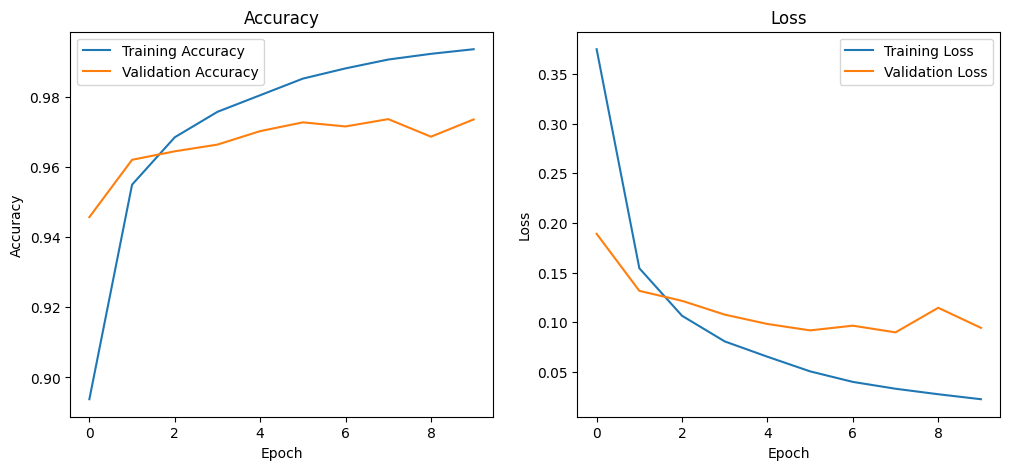

In [8]:
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

* Akurasi meningkat seiring epoch
* Loss menurun → model belajar dengan baik

# **Evaluasi Model**

In [9]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat, verbose=0)

print("Test Accuracy :", test_accuracy)
print("Test Loss     :", test_loss)

Test Accuracy : 0.9758999943733215
Test Loss     : 0.08813552558422089


# **Confusion Matrix & Classification Report**

In [10]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.96      0.98      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.95      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.98      0.95      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



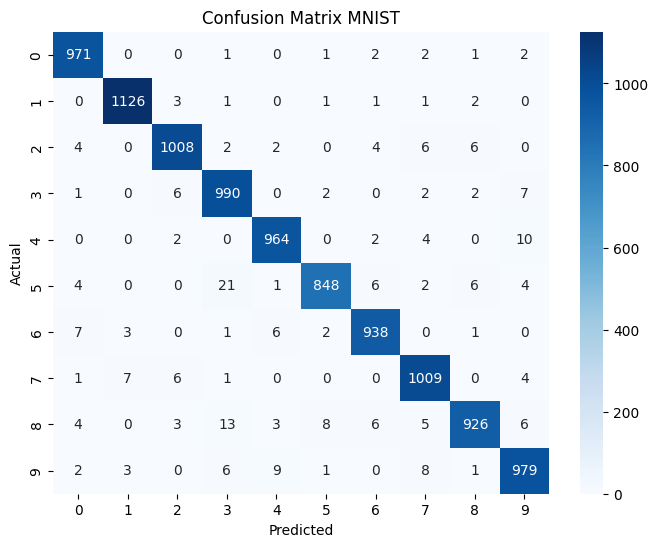

In [11]:
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix MNIST")
plt.show()

* Confusion matrix menunjukkan digit yang sering tertukar
* Misalnya: angka 4 dan 9

# **Visualisasi Prediksi**

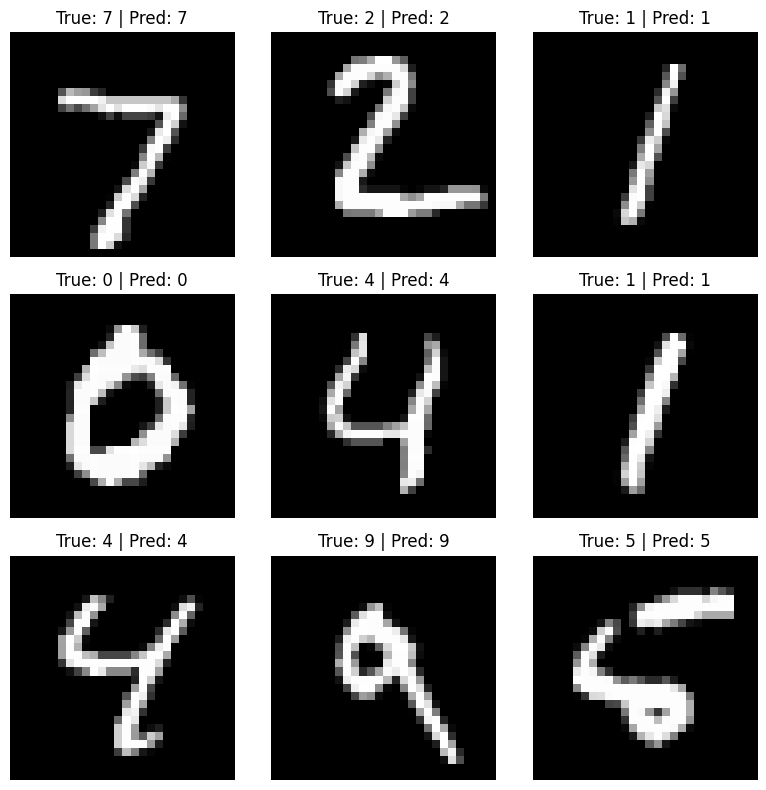

In [12]:
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"True: {y_test[i]} | Pred: {y_pred_classes[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# **Ksimpulan**
Penerapan MLP pada dataset MNIST menunjukkan bahwa ANN mampu bekerja secara efektif pada data citra dengan tingkat kompleksitas tinggi, namun memerlukan preprocessing dan arsitektur yang berbeda dibandingkan dataset tabular seperti Titanic, di mana data bersifat numerik dan jumlah kelas lebih sedikit, sehingga proses pelatihan lebih sederhana dan kebutuhan representasi fitur tidak sekompleks pada data citra.